# 基于Pybroker框架的量化交易策略

* 量化交易策略平台：掘金，聚宽，米筐，优矿等
* 常见的量化交易策略库：Zipline、Backtrader、PyBroker等

## 什么是量化交易策略

量化交易策略是指通过数学模型和算法，对金融市场的价格、趋势、波动等数据进行挖掘和分析，从而制定出买卖股票、期货、外汇等金融产品的交易策略。

## pybroker框架

pybroker是一个基于Python的量化交易策略框架，它提供了一套完整的量化交易策略开发、回测、模拟和实盘交易的功能。

https://www.pybroker.com/zh-cn/latest/index.html

https://github.com/edtechre/pybroker/tree/master

* 库很新，学习资源少，除了官方文档，没有其他学习资料，借助大模型阅读源代码进行提问学习会有帮助
* 使用简单，速度快，支持在线akshare数据源也支持离线数据，对机器学习模型支持友好

## pybroker安装（本课程第一次课大部分同学已经完成安装不需要再走下面的流程）

* 直接pip通常可以：pip install lib-pybroker -i https://pypi.tuna.tsinghua.edu.cn/simple
* 建议先创建虚拟环境在再在虚拟环境中装库（如果直接装好能用那就不用搞虚拟环境）
* 如果想要和talib结合，某些版本因为numpy版本冲突，可能需要先安装ta-lib再安装pybroker

ta_lib安装需要下载对应版本的ta_lib库

https://github.com/cgohlke/talib-build/releases

## pybroker与akshare的使用

* 由于akshare是一个爬虫接口，对应数据源通常会不稳定，一旦出现异常常用手段就是保持更新

* pip install --upgrade lib-pybroker akshare -i https://pypi.tuna.tsinghua.edu.cn/simple

## pybroker 的数据形式与离线保存

* pybroker对数据的要求

* 离线保存后，pybroker会自动读取离线数据，避免总是网络获取

In [1]:
import pybroker
from pybroker import ExecContext, StrategyConfig, Strategy
from pybroker.ext.data import AKShare
import matplotlib.pyplot as plt

akshare = AKShare()

pybroker.enable_data_source_cache('akshare')

In [2]:
# 获取股票数据
# 你可以用000001替换000001.SZ，程序仍然可以正常运行！
# 并且你可以将起始日期设置为“20210301”这种格式。
# 你还可以将“adjust”设置为“qfq”（前复权）或“hfq”（后复权）来调整数据，
# 并将“timeframe”设置为“1d”（日数据）、“1w”（周数据）以获取每日、每周的数据。 
df = akshare.query(
    symbols=['000001.SZ', '600000.SH'],
    start_date='3/2/2021',
    end_date='3/1/2023',
    adjust="hfq",
    timeframe="1d",
)
df

Loaded cached bar data.



,date,symbol,open,high,low,close,volume
486,2021-03-02,600000.SH,93.71,94.30,92.06,92.79,747631
487,2021-03-03,600000.SH,92.65,95.75,92.52,95.75,1135709
488,2021-03-04,600000.SH,94.96,95.75,94.70,95.49,754129
489,2021-03-05,600000.SH,95.42,95.89,94.24,95.36,721548
490,2021-03-08,600000.SH,96.15,96.41,94.37,94.63,801531
...,...,...,...,...,...,...,...
481,2023-02-23,000001.SZ,2481.29,2533.30,2478.04,2489.42,824491
482,2023-02-24,000001.SZ,2484.54,2486.17,2448.78,2458.54,729989
483,2023-02-27,000001.SZ,2440.66,2461.79,2429.28,2430.91,621462
484,2023-02-28,000001.SZ,2440.66,2456.91,2417.90,2445.53,607936


In [2]:
df = akshare.query(symbols='000001', start_date='20200101', end_date='20230830', adjust='')

Loaded cached bar data.



In [9]:
df

,date,symbol,open,high,low,close,volume
0,2020-01-02,000001,16.65,16.95,16.55,16.87,1530232
1,2020-01-03,000001,16.94,17.31,16.92,17.18,1116195
2,2020-01-06,000001,17.01,17.34,16.91,17.07,862084
3,2020-01-07,000001,17.13,17.28,16.95,17.15,728608
4,2020-01-08,000001,17.00,17.05,16.63,16.66,847824
...,...,...,...,...,...,...,...
884,2023-08-24,000001,11.29,11.32,11.05,11.13,1291271
885,2023-08-25,000001,11.10,11.33,11.08,11.23,845350
886,2023-08-28,000001,11.84,11.93,11.49,11.52,1997610
887,2023-08-29,000001,11.47,11.49,11.13,11.31,1964961


## 第一个量化策略

* 数据的导入

* 策略函数的编写与运行机制：每天每个股票都会运行一次

* 策略的结果分析

In [18]:

# 定义交易策略函数
def buy_func(ctx: ExecContext) -> None:
    pos = ctx.long_pos()  # 获取当前的长期持有的股票
    print(ctx.dt)
    #print(ctx.date[-1])
    #print(ctx.volume)
    #print(ctx.symbol)
    if pos:  # 如果当前持有股票
        #ctx.sell_shares = pos.shares  # 卖出所有的股票
        pass
    else:  # 如果当前没有持有股票
        ctx.buy_shares = ctx.calc_target_shares(0.5)  # 买入全部可购买的股票
        ctx.hold_bars = 3  # 设置持有的交易日为3天


# 创建策略配置对象，设置初始现金为 500,000 元
my_config = StrategyConfig(initial_cash=500000)

# 创建策略对象，设置数据源为 AKShare，开始日期为 '20230801'，结束日期为 '20230830'，策略配置为 my_config
strategy = Strategy(data_source=akshare, start_date='20230801', end_date='20230830', config=my_config)

# 将定义的交易策略函数添加到策略对象中，应用于股票 '000001'
strategy.add_execution(fn=buy_func, symbols=['000001',"600000"])

# 执行回测
result = strategy.backtest()

Backtesting: 2023-08-01 00:00:00 to 2023-08-30 00:00:00

Loaded cached bar data.

Test split: 2023-08-01 00:00:00 to 2023-08-30 00:00:00


  0% (0 of 22) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (22 of 22) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


2023-08-01 00:00:00
2023-08-01 00:00:00
2023-08-02 00:00:00
2023-08-02 00:00:00
2023-08-03 00:00:00
2023-08-03 00:00:00
2023-08-04 00:00:00
2023-08-04 00:00:00
2023-08-07 00:00:00
2023-08-07 00:00:00
2023-08-08 00:00:00
2023-08-08 00:00:00
2023-08-09 00:00:00
2023-08-09 00:00:00
2023-08-10 00:00:00
2023-08-10 00:00:00
2023-08-11 00:00:00
2023-08-11 00:00:00
2023-08-14 00:00:00
2023-08-14 00:00:00
2023-08-15 00:00:00
2023-08-15 00:00:00
2023-08-16 00:00:00
2023-08-16 00:00:00
2023-08-17 00:00:00
2023-08-17 00:00:00
2023-08-18 00:00:00
2023-08-18 00:00:00
2023-08-21 00:00:00
2023-08-21 00:00:00
2023-08-22 00:00:00
2023-08-22 00:00:00
2023-08-23 00:00:00
2023-08-23 00:00:00
2023-08-24 00:00:00
2023-08-24 00:00:00
2023-08-25 00:00:00
2023-08-25 00:00:00
2023-08-28 00:00:00
2023-08-28 00:00:00
2023-08-29 00:00:00
2023-08-29 00:00:00
2023-08-30 00:00:00
2023-08-30 00:00:00

Finished backtest: 0:00:00


<Axes: xlabel='date'>

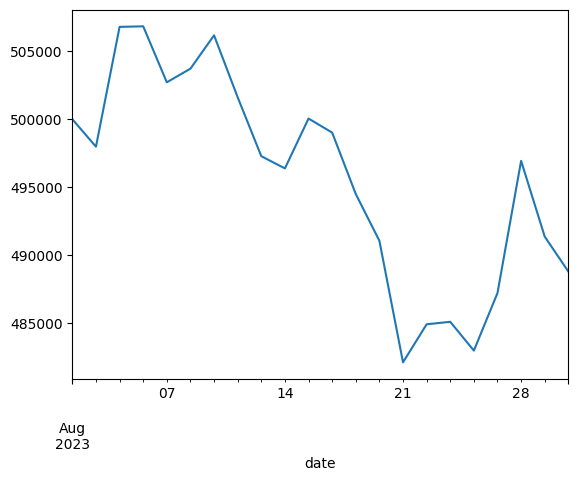

In [19]:
result.portfolio.equity.plot()

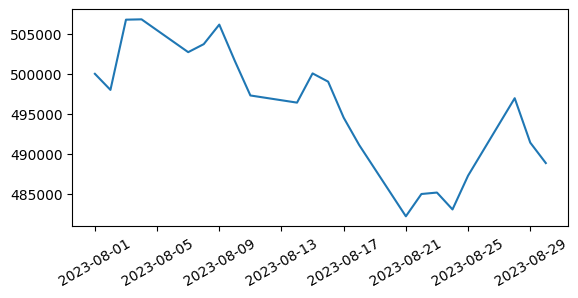

In [20]:

chart = plt.subplot2grid((5, 2), (0, 0), rowspan=3, colspan=2)
plt.xticks(rotation=30)
chart.plot(result.portfolio.index, result.portfolio['market_value'])


In [8]:
#result.orders

In [7]:
#result.portfolio

In [5]:
#result.positions

In [6]:
#result.trades

In [21]:
result.metrics_df

,name,value
0,trade_count,10.000000
1,initial_market_value,500000.000000
2,end_market_value,488816.610000
3,total_pnl,-8620.250000
4,unrealized_pnl,-2563.140000
5,total_return_pct,-1.724050
6,total_profit,8971.780000
7,total_loss,-17592.030000
8,total_fees,0.000000
9,max_drawdown,-24678.790000


### classwork1

设定，时间2023年整年，初始金额1000000，编写如下策略：


* 导入002594 比亚迪单个股票数据，一开始就购买一直持有到最后

* 导入002594 比亚迪和'000001' 股票数据，一开始就购买各50%，每次持有2天 

查看策略的收益曲线与各项指标


## 基本交易操作：买入，卖出，止损，止盈

In [26]:
df0 = akshare.query(symbols='000001', start_date='20200101', end_date='20230101', adjust='')
#df0.plot()

Loading bar data...
Loaded bar data: 0:00:01 



<Axes: >

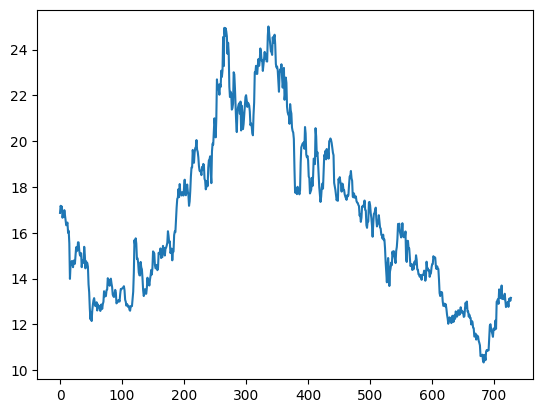

In [27]:
df0.close.plot()

In [28]:
df1 = akshare.query(symbols='002594', start_date='20200101', end_date='20230101', adjust='')
#df0.plot()

Loading bar data...
Loaded bar data: 0:00:00 



<Axes: >

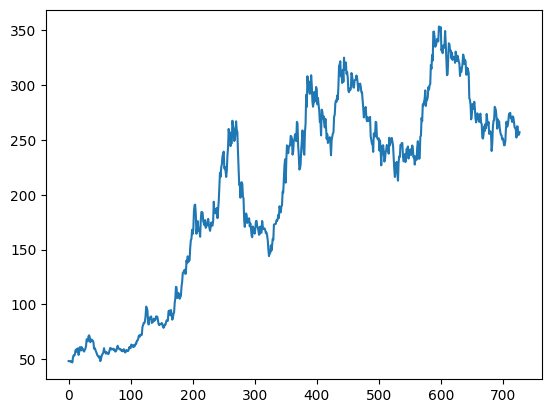

In [29]:
df1.close.plot()

In [31]:
strategy = Strategy(akshare, start_date='2020-01-01', end_date='2023-01-01')
strategy.add_execution(buy_by_proportion, ['000001.SZ','002594.SZ'])
result = strategy.backtest()

Backtesting: 2020-01-01 00:00:00 to 2023-01-01 00:00:00

Loading bar data...
Loaded bar data: 0:00:00 

Test split: 2020-01-02 00:00:00 to 2022-12-30 00:00:00


  0% (0 of 728) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--
 11% (81 of 728) |##                     | Elapsed Time: 0:00:00 ETA:   0:00:00
 24% (181 of 728) |#####                 | Elapsed Time: 0:00:00 ETA:   0:00:00
 38% (281 of 728) |########              | Elapsed Time: 0:00:00 ETA:   0:00:00
 52% (381 of 728) |###########           | Elapsed Time: 0:00:00 ETA:   0:00:00
 64% (471 of 728) |##############        | Elapsed Time: 0:00:00 ETA:   0:00:00
 75% (551 of 728) |################      | Elapsed Time: 0:00:00 ETA:   0:00:00
 89% (651 of 728) |###################   | Elapsed Time: 0:00:00 ETA:   0:00:00
 97% (711 of 728) |##################### | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (728 of 728) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



Finished backtest: 0:00:01


In [32]:
result.orders

,type,symbol,date,shares,limit_price,fill_price,fees
id,,,,,,,
1,buy,000001.SZ,2020-01-03,1185,NaN,17.12,0.0
2,buy,002594.SZ,2020-01-03,415,NaN,48.34,0.0


<Axes: xlabel='date'>

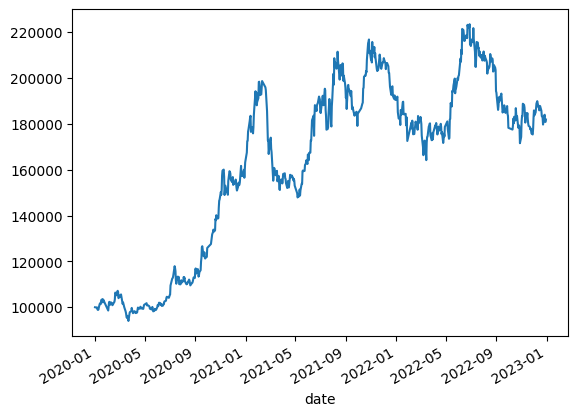

In [33]:
result.portfolio.equity.plot()

### 买入操作
 * 固定数量买入：通过`ExecContext.buy_shares`属性设置买入股票数量。

In [2]:
def buy_fixed_shares(ctx):
    if not ctx.long_pos():
        ctx.buy_shares = 100

* 按资金比例买入：利用`ExecContext.calc_target_shares`方法，根据目标资金比例计算买入数量。

In [30]:
def buy_by_proportion(ctx):
    if not ctx.long_pos():
        target_size = 0.2  # 使用20%资金
        ctx.buy_shares = ctx.calc_target_shares(target_size)

### 卖出操作
* 卖出所有多头股票：使用`ExecContext.sell_all_shares()`方法平仓所有多头头寸。

In [11]:
def sell_all_long_shares(ctx):
    if ctx.long_pos():
        ctx.sell_all_shares()

* 按数量卖出：通过`ExecContext.sell_shares`属性设置卖出股票数量。

In [ ]:
def sell_fixed_shares(ctx):
    if ctx.long_pos():
        ctx.sell_shares = 50

### 止损操作
* 百分比止损：借助`ExecContext.stop_loss_pct`属性，按入场价格的百分比设置止损。

In [11]:
def buy_with_percentage_stop_loss(ctx):
    if not ctx.long_pos():
        ctx.buy_shares = ctx.calc_target_shares(1)
        ctx.stop_loss_pct = 15  # 入场价下跌15%止损

* 移动止损：利用`ExecContext.stop_trailing_pct`属性，当证券价格跌破最高市场价格一定百分比时退出交易。

In [ ]:
def buy_with_trailing_stop_loss(ctx):
    if not ctx.long_pos():
        ctx.buy_shares = ctx.calc_target_shares(1)
        ctx.stop_trailing_pct = 10  # 最高市场价下跌10%止损

* 设定限价与止损结合：同时设置止损和限价，确保订单在特定价格执行。

ctx.stop_loss_limit 是 ExecContext 对象中的一个属性，用于设置止损的限价，即当触发止损时，希望股票以不低于这个限价的价格卖出。这里设置为当前收盘价减 2，意味着当股票价格下跌到当前收盘价减去 2 的价位时，触发止损并且以不低于这个价格的条件卖出股票，确保在一个相对理想的价格执行止损操作。

In [ ]:
def buy_with_stop_and_limit(ctx):
    if not ctx.long_pos():
        ctx.buy_shares = ctx.calc_target_shares(1)
        ctx.stop_loss_pct = 15
        ctx.stop_loss_limit = ctx.close[-1] - 2  # 止损限价为当前收盘价减2

### 止盈操作

可以使用获利单来锁定交易的利润。以下代码在入场价格上涨 10% 处添加了一个获利单：

In [ ]:
def buy_with_stop_loss_and_profit(ctx):
    if not ctx.long_pos():
        ctx.buy_shares = ctx.calc_target_shares(1)
        ctx.stop_loss_pct = 20
        ctx.stop_profit_pct = 10

### 策略内自定义数据

ExecContext.session 是一个字典，执行期间每个时间点都持续存在的自定义数据

In [ ]:
def simple_strategy(ctx: ExecContext):
    # 初始化 session 中的计数器
    if 'counter' not in ctx.session:
        ctx.session['counter'] = 0

    # 每次执行策略时计数器加 1
    ctx.session['counter'] += 1

### 直接买入


In [86]:
def trying_strategy(ctx: ExecContext):

    if not ctx.long_pos():
        ctx.buy_shares = ctx.calc_target_shares(0.5)

strategy = Strategy(akshare, start_date='2020-01-01', end_date='2023-01-01')
strategy.add_execution(trying_strategy, ['000001.SZ','002594.SZ'])
result = strategy.backtest()

Backtesting: 2020-01-01 00:00:00 to 2023-01-01 00:00:00

Loaded cached bar data.

Test split: 2020-01-02 00:00:00 to 2022-12-30 00:00:00


  0% (0 of 728) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--
  5% (41 of 728) |#                      | Elapsed Time: 0:00:00 ETA:   0:00:00
 12% (91 of 728) |##                     | Elapsed Time: 0:00:00 ETA:   0:00:00
 20% (151 of 728) |####                  | Elapsed Time: 0:00:00 ETA:   0:00:00
 30% (221 of 728) |######                | Elapsed Time: 0:00:00 ETA:   0:00:00
 41% (301 of 728) |#########             | Elapsed Time: 0:00:00 ETA:   0:00:00
 53% (391 of 728) |###########           | Elapsed Time: 0:00:00 ETA:   0:00:00
 66% (481 of 728) |##############        | Elapsed Time: 0:00:00 ETA:   0:00:00
 75% (551 of 728) |################      | Elapsed Time: 0:00:00 ETA:   0:00:00
 86% (631 of 728) |###################   | Elapsed Time: 0:00:00 ETA:   0:00:00
 99% (721 of 728) |##################### | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (728 of 728) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



Finished backtest: 0:00:01


In [87]:
result.orders

,type,symbol,date,shares,limit_price,fill_price,fees
id,,,,,,,
1,buy,000001.SZ,2020-01-03,2963,NaN,17.12,0.0
2,buy,002594.SZ,2020-01-03,1019,NaN,48.34,0.0


In [89]:
result.metrics_df.loc[2]

name     end_market_value
value           300860.49
Name: 2, dtype: object

In [90]:
result.metrics_df.loc[32]

name       sharpe
value    0.038323
Name: 32, dtype: object

### 简单策略1：各买入50%亏损10%卖出，然后不再交易

In [52]:
def trying_strategy(ctx: ExecContext):
    if "one_buy_sell" not in ctx.session:
        ctx.session["one_buy_sell"] = False

    if not ctx.long_pos() and not ctx.session["one_buy_sell"]:
        ctx.buy_shares = ctx.calc_target_shares(0.5)
        ctx.stop_loss_pct = 10
        ctx.session["one_buy_sell"] = True

strategy = Strategy(akshare, start_date='2020-01-01', end_date='2023-01-01')
strategy.add_execution(trying_strategy, ['000001.SZ','002594.SZ'])
result = strategy.backtest()

Backtesting: 2020-01-01 00:00:00 to 2023-01-01 00:00:00

Loaded cached bar data.

Test split: 2020-01-02 00:00:00 to 2022-12-30 00:00:00


  0% (0 of 728) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--
 11% (81 of 728) |##                     | Elapsed Time: 0:00:00 ETA:   0:00:00
 30% (221 of 728) |######                | Elapsed Time: 0:00:00 ETA:   0:00:00
 49% (361 of 728) |##########            | Elapsed Time: 0:00:00 ETA:   0:00:00
 71% (521 of 728) |###############       | Elapsed Time: 0:00:00 ETA:   0:00:00
 93% (681 of 728) |####################  | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (728 of 728) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



Finished backtest: 0:00:00


In [54]:
result.orders

,type,symbol,date,shares,limit_price,fill_price,fees
id,,,,,,,
1,buy,000001.SZ,2020-01-03,2963,NaN,17.12,0.0
2,buy,002594.SZ,2020-01-03,1019,NaN,48.34,0.0
3,sell,000001.SZ,2020-01-23,2963,NaN,15.41,0.0


In [55]:
result.metrics_df.head(5)

,name,value
0,trade_count,1.00
1,initial_market_value,100000.00
2,end_market_value,307521.31
3,total_pnl,-5072.66
4,unrealized_pnl,212593.97


### 简单策略2：各买入50%亏损10%卖出或者赚20卖出，然后不再交易

In [45]:
def trying_strategy(ctx: ExecContext):
    if "one_buy_sell" not in ctx.session:
        ctx.session["one_buy_sell"] = False

    if not ctx.long_pos() and not ctx.session["one_buy_sell"]:
        ctx.buy_shares = ctx.calc_target_shares(0.5)
        ctx.stop_trailing_pct = 10
        ctx.stop_profit_pct = 20
        ctx.session["one_buy_sell"] = True

strategy = Strategy(akshare, start_date='2020-01-01', end_date='2023-01-01')
strategy.add_execution(trying_strategy, ['000001.SZ','002594.SZ'])
result = strategy.backtest()

Backtesting: 2020-01-01 00:00:00 to 2023-01-01 00:00:00

Loaded cached bar data.

Test split: 2020-01-02 00:00:00 to 2022-12-30 00:00:00


  0% (0 of 728) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (728 of 728) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



Finished backtest: 0:00:00


In [46]:
result.orders

,type,symbol,date,shares,limit_price,fill_price,fees
id,,,,,,,
1,buy,000001.SZ,2020-01-03,2963,NaN,17.12,0.0
2,buy,002594.SZ,2020-01-03,1019,NaN,48.34,0.0
3,sell,002594.SZ,2020-01-17,1019,NaN,58.01,0.0
4,sell,000001.SZ,2020-01-23,2963,NaN,15.61,0.0


In [47]:
result.metrics_df.head(5)

,name,value
0,trade_count,2.000000e+00
1,initial_market_value,1.000000e+05
2,end_market_value,1.053657e+05
3,total_pnl,5.365710e+03
4,unrealized_pnl,5.456968e-12


### 简单策略3：各买入50%，最高市场价下跌10%止损, 然后不再交易

In [51]:
def trying_strategy(ctx: ExecContext):
    if "one_buy_sell" not in ctx.session:
        ctx.session["one_buy_sell"] = False

    if not ctx.long_pos() and not ctx.session["one_buy_sell"]:
        ctx.buy_shares = ctx.calc_target_shares(0.5)
        ctx.stop_trailing_pct = 10
        ctx.session["one_buy_sell"] = True

strategy = Strategy(akshare, start_date='2020-01-01', end_date='2023-01-01')
strategy.add_execution(trying_strategy, ['000001.SZ','002594.SZ'])
result = strategy.backtest()

Backtesting: 2020-01-01 00:00:00 to 2023-01-01 00:00:00

Loaded cached bar data.

Test split: 2020-01-02 00:00:00 to 2022-12-30 00:00:00


  0% (0 of 728) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--
100% (728 of 728) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



Finished backtest: 0:00:00


In [49]:
result.orders

,type,symbol,date,shares,limit_price,fill_price,fees
id,,,,,,,
1,buy,000001.SZ,2020-01-03,2963,NaN,17.12,0.0
2,buy,002594.SZ,2020-01-03,1019,NaN,48.34,0.0
3,sell,000001.SZ,2020-01-23,2963,NaN,15.61,0.0
4,sell,002594.SZ,2020-02-03,1019,NaN,54.48,0.0


In [50]:
result.metrics_df.head(5)

,name,value
0,trade_count,2.000000e+00
1,initial_market_value,1.000000e+05
2,end_market_value,1.017707e+05
3,total_pnl,1.770680e+03
4,unrealized_pnl,-7.275958e-12


## 常用简单量化策略的pybroker实现

### 突破策略
- **策略原理**：当股票价格突破近期的高点或者低点时，产生相应的买入或卖出信号。
- **具体操作**：
    - **买入条件**：观察一段时间（如10个交易日）内的股票最高价，当今日收盘价突破这10日的最高价时，以收盘价买入股票。同时，设置止损价位为买入价下跌10%，止盈价位为买入价上涨20%。
    - **卖出条件**：当股票价格跌破止损价位或者达到止盈价位时，卖出股票。另外，若观察到一段时间内的最低价被突破（即收盘价低于过去10日最低价），也可考虑卖出股票，以控制风险。


In [79]:
def trying_strategy(ctx: ExecContext):
    high = ctx.high[-11:-1].max()
    low = ctx.low[-11:-1].min()
    #print(high, low)

    if not ctx.long_pos() and ctx.close[-1] > high:
        ctx.buy_shares = ctx.calc_target_shares(0.5)
        ctx.stop_loss_pct = 10
        ctx.stop_profit_pct = 20
    
    if ctx.long_pos() and ctx.close[-1] < low:
        ctx.sell_all_shares()

strategy = Strategy(akshare, start_date='2020-01-01', end_date='2023-01-01')
strategy.add_execution(trying_strategy, ['000001.SZ','002594.SZ'])
result = strategy.backtest(warmup=15)

Backtesting: 2020-01-01 00:00:00 to 2023-01-01 00:00:00

Loaded cached bar data.

Test split: 2020-01-02 00:00:00 to 2022-12-30 00:00:00


  0% (0 of 728) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--
 16% (121 of 728) |###                   | Elapsed Time: 0:00:00 ETA:   0:00:00
 27% (201 of 728) |######                | Elapsed Time: 0:00:00 ETA:   0:00:00
 46% (341 of 728) |##########            | Elapsed Time: 0:00:00 ETA:   0:00:00
 66% (481 of 728) |##############        | Elapsed Time: 0:00:00 ETA:   0:00:00
 90% (661 of 728) |###################   | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (728 of 728) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



Finished backtest: 0:00:00


In [80]:
result.orders

,type,symbol,date,shares,limit_price,fill_price,fees
id,,,,,,,
1,buy,000001.SZ,2020-02-18,3253,NaN,15.17,0.0
2,buy,002594.SZ,2020-02-21,744,NaN,66.97,0.0
3,sell,000001.SZ,2020-03-02,3253,NaN,14.70,0.0
4,sell,002594.SZ,2020-03-09,744,NaN,60.27,0.0
5,buy,002594.SZ,2020-04-01,779,NaN,58.84,0.0
...,...,...,...,...,...,...,...
80,buy,000001.SZ,2022-11-14,8075,NaN,11.99,0.0
81,sell,002594.SZ,2022-11-21,341,NaN,249.76,0.0
82,buy,002594.SZ,2022-12-02,322,NaN,264.02,0.0


In [81]:
result.metrics_df.loc[2]

name     end_market_value
value           187026.36
Name: 2, dtype: object

In [82]:
result.metrics_df.loc[32]

name       sharpe
value    0.046867
Name: 32, dtype: object

### 高低点反转策略
- **策略原理**：基于股票价格在高低点之间的反转趋势进行操作。
- **具体操作**：
    - **买入条件**：当股票价格连续下跌后，出现当日最低价低于前几日的最低价，且当日收盘价高于当日最低价一定幅度（如5%），则认为可能出现反转，以当日收盘价买入股票。止损设置为买入价下跌8%，止盈设置为买入价上涨15%。
    - **卖出条件**：当股票价格达到止盈价位或者跌破止损价位时卖出。此外，若买入后股票价格未能持续上涨，再次出现当日最高价低于前几日最高价，且收盘价低于当日最高价一定幅度（如3%），也可考虑卖出股票，避免进一步损失。

In [83]:
def trying_strategy(ctx: ExecContext):
    high = ctx.high[-6:-1].max()
    low = ctx.low[-6:-1].min()
    #print(high, low)

    if not ctx.long_pos() and ctx.close[-1] > ctx.low[-1] * 1.05 and ctx.low[-1] < low:
        ctx.buy_shares = ctx.calc_target_shares(0.5)
        ctx.stop_loss_pct = 8
        ctx.stop_profit_pct = 15

    if ctx.long_pos() and ctx.close[-1] < ctx.high[-1] * 0.97 and ctx.high[-1] < high:
        ctx.sell_all_shares()


strategy = Strategy(akshare, start_date='2020-01-01', end_date='2023-01-01')
strategy.add_execution(trying_strategy, ['000001.SZ','002594.SZ'])
result = strategy.backtest(warmup=15)

Backtesting: 2020-01-01 00:00:00 to 2023-01-01 00:00:00

Loaded cached bar data.

Test split: 2020-01-02 00:00:00 to 2022-12-30 00:00:00


  0% (0 of 728) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--
 61% (451 of 728) |#############         | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (728 of 728) |######################| Elapsed Time: 0:00:00 Time:  0:00:00



Finished backtest: 0:00:00


In [84]:
result.orders

,type,symbol,date,shares,limit_price,fill_price,fees
id,,,,,,,
1,buy,002594.SZ,2020-03-16,898,NaN,55.60,0.0
2,sell,002594.SZ,2020-03-17,898,NaN,53.42,0.0
3,buy,002594.SZ,2021-03-08,249,NaN,187.03,0.0
4,sell,002594.SZ,2021-03-09,249,NaN,170.32,0.0
5,buy,002594.SZ,2021-03-10,275,NaN,178.83,0.0
6,sell,002594.SZ,2021-03-15,275,NaN,176.50,0.0
7,buy,002594.SZ,2021-07-29,197,NaN,250.06,0.0
8,sell,002594.SZ,2021-08-02,197,NaN,287.57,0.0
9,buy,002594.SZ,2021-08-24,173,NaN,296.02,0.0


In [85]:
result.metrics_df.loc[2]

name     end_market_value
value           111652.36
Name: 2, dtype: object

### 收盘价偏离策略
- **策略原理**：根据收盘价与近期价格的偏离程度来决定买卖操作。
- **具体操作**：
    - **买入条件**：计算过去N日（如15日）的平均收盘价，当今日收盘价低于该平均收盘价一定比例（如10%）时，买入股票。同时设置止损为买入价下跌7%，止盈为买入价上涨18%。
    - **卖出条件**：当股票价格达到止盈价位或者跌破止损价位时进行卖出操作。如果在持有期间，收盘价连续多日（如3日）高于平均收盘价，也可考虑部分或全部卖出股票，落袋为安。